In [1]:
from tensorflow.keras.models import load_model
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [2]:
# IMG_SIZE = (28, 28)
IMG_SIZE = (56, 56)

In [3]:
# model = load_model('es_func_folder_x3.h5')
# model = load_model('es_func_exp.h5')
model = load_model('es_func_folder_56x3.h5')

In [4]:
def prediction(img_path):
    img = Image.open(img_path).resize(IMG_SIZE, Image.ANTIALIAS).convert('RGB')
    img = np.array(img)
    pred = model.predict(np.expand_dims(img, axis=0))
    return np.argmax(pred)

In [5]:
folder = '/home/a/datasets/mnist_png_160x3/testing/5/' # fol-98.3% exp-99.1% 56-99%
# folder = '/home/a/datasets/mnist_png/testing/9/' # fol-99.7%, exp-98.7%, 56-98%

files = [f for f in os.listdir(folder) if 'png' in f or 'jpg' in f]

2597.png 3


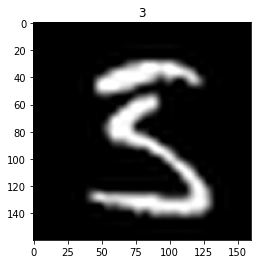

3968.png 3


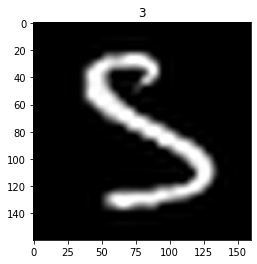

9729.png 6


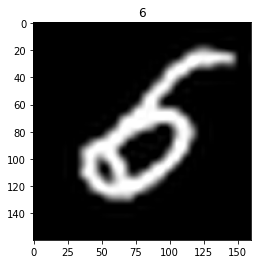

1393.png 3


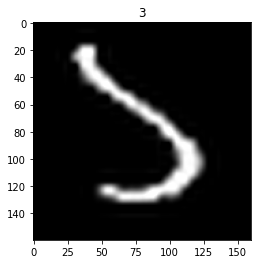

1737.png 3


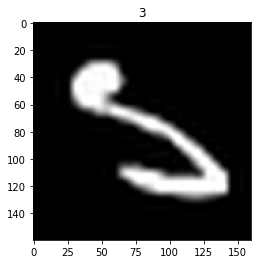

99.43946188340807 %
(array([3, 5, 6]), array([  4, 887,   1]))


In [6]:
preds = []
count = 0
for i in range(0, len(files)):
    res = prediction(os.path.join(folder,files[i]))
    preds.append(res)
    if pathlib.PurePath(folder).name  == str(res):
        count += 1
    else: 
        print(files[i], res)
        plt.imshow(cv2.imread(os.path.join(folder,files[i])))
        plt.title(res)
        plt.show()
print (count / len(files) * 100, '%')   

results = np.array(preds)
print(np.unique(results, return_counts=True))